<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exam pizza**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.decomposition import PCA

# insert data

In [6]:
dataex = pd.read_csv('/content/Pizza.csv')

In [7]:
dataex

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [8]:
dataex.shape

(300, 9)

In [9]:
dataex.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


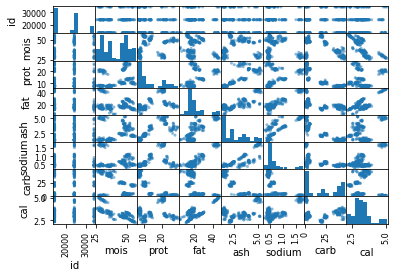

In [10]:
pd.plotting.scatter_matrix(dataex); 
## plot กราฟ

In [11]:
## check matrix 
dataex_matrix = np.array(dataex.iloc[:,-6:])
dataex_matrix

array([[21.43, 44.87,  5.11,  1.77,  0.77,  4.93],
       [21.26, 43.89,  5.34,  1.79,  1.02,  4.84],
       [19.99, 45.78,  5.08,  1.63,  0.8 ,  4.95],
       ...,
       [11.01, 16.03,  2.43,  0.64, 25.98,  2.92],
       [10.43, 15.18,  2.32,  0.56, 24.47,  2.76],
       [ 9.91, 15.5 ,  2.27,  0.57, 25.48,  2.81]])

In [12]:
newdataex = dataex.iloc[:,2:]
newdataex

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


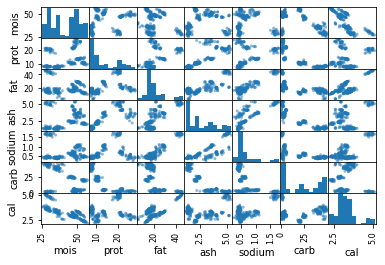

In [13]:
pd.plotting.scatter_matrix(newdataex); 

check correlation ของ columns

In [14]:
corr = np.corrcoef(newdataex.to_numpy().T)
corr.shape

(7, 7)

In [15]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [16]:
for i in range(corr.shape[0]) :
        for j in range(corr.shape[1]) :
             if ( i !=j ) and (corr[i,j] ==1.) :
                 print(f'row = {i} column = {j} corrcoef = {corr[i,j]} ')

## ไม่มีค่าซ้ำกัน สร้างตารางใหม่

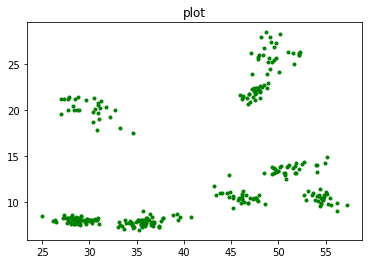

In [17]:
plt.plot(newdataex.iloc[:,0], newdataex.iloc[:,1], 'g.' );
plt.title('plot');

In [18]:
dataex_graph = dataex.drop(['id'], axis=1)
dataex_graph

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [19]:
dataex_drop = dataex.drop([ 'id','brand'], axis=1)
dataex_drop

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


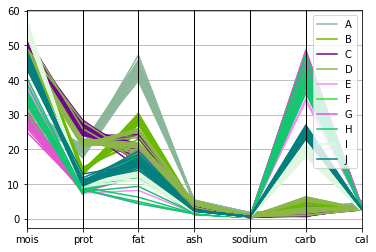

In [20]:
pd.plotting.parallel_coordinates(dataex_graph, 'brand')

### **PCA**

In [21]:
pca = PCA(n_components=2)

In [25]:
newpca = pca.fit_transform(dataex_drop.to_numpy())
newpca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [24]:
newpca.shape

(300, 2)

In [28]:
BD = set(dataex['brand'])
BD

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [34]:
BD_list = list ('brand')
BD_list.sort()
color_list = {}
num = 0
for each_BD in BD:
    if each_BD not in color_list:
       color_list[each_BD] = num
       num +=1

## ใช้ตัวเลขแทนโค้ดสี

In [32]:
color_list

{'A': 8,
 'B': 9,
 'C': 5,
 'D': 6,
 'E': 7,
 'F': 3,
 'G': 0,
 'H': 1,
 'I': 2,
 'J': 4}

In [58]:
dataex_seco = dataex_graph.replace(color_list)
dataex_seco

,brand,mois,prot,fat,ash,sodium,carb,cal
0,8,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,8,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,8,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,8,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,8,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,4,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,4,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,4,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,4,47.60,10.43,15.18,2.32,0.56,24.47,2.76


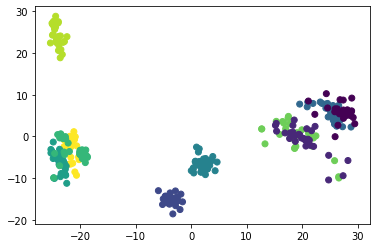

In [56]:
plt.scatter(newpca[:, 0], newpca[:,1], c = dataex_seco['brand'])

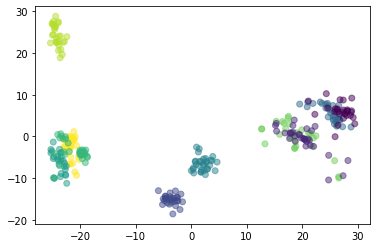

In [38]:
plt.scatter(newpca[:, 0], newpca[:,1], c = dataex_seco['brand'], alpha= 0.5)

In [46]:
dataex_test = dataex_seco[(dataex_seco['brand']== 2) | (dataex_seco['brand']== 4)]
dataex_test

,brand,mois,prot,fat,ash,sodium,carb,cal
239,2,54.64,10.36,12.89,2.21,0.53,19.90,2.37
240,2,54.52,9.85,13.55,2.04,0.47,20.05,2.42
241,2,53.84,10.22,13.05,2.07,0.48,20.82,2.42
242,2,54.32,10.66,14.04,2.03,0.46,18.95,2.45
243,2,52.90,10.19,14.35,2.02,0.49,20.54,2.52
...,...,...,...,...,...,...,...,...
295,4,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,4,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,4,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,4,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [51]:
pca = PCA(n_components=2)
newpca_2 = pca.fit_transform(dataex_test.iloc[:,1:].to_numpy())

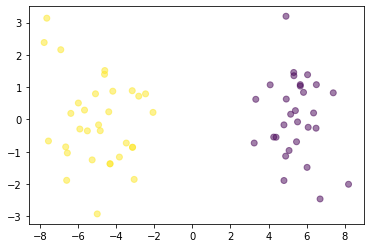

In [59]:
plt.scatter(newpca_2[:, 0], newpca_2[:,1], c = dataex_test['brand'], alpha= 0.5)

In [62]:
brandC_pca = pca.transform(dataex_test[dataex_test['brand']==2].iloc[:,1:].to_numpy())
brandE_pca = pca.transform(dataex_test[dataex_test['brand']==4].iloc[:,1:].to_numpy())

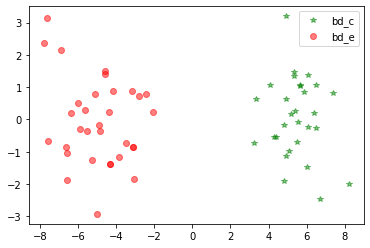

In [66]:
plt.plot(brandC_pca[:,0], brandC_pca[:,1], '*g', alpha=0.5, label= 'bd_c')
plt.plot(brandE_pca[:,0], brandE_pca[:,1], 'or', alpha=0.5, label= 'bd_e')
plt.legend()

#ใส่ชื่อกราฟและแกน

In [67]:
pca.explained_variance_ratio_

array([0.93446783, 0.05231986])

Text(0, 0.5, 'PCA2 (5.23%)')

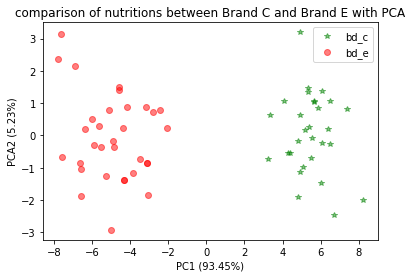

In [68]:
plt.plot(brandC_pca[:,0], brandC_pca[:,1], '*g', alpha=0.5, label= 'bd_c')
plt.plot(brandE_pca[:,0], brandE_pca[:,1], 'or', alpha=0.5, label= 'bd_e')
plt.legend()
plt.title('comparison of nutritions between Brand C and Brand E with PCA') #ชื่อกราฟ
plt.xlabel('PC1 (93.45%)') #ชื่อแกน x
plt.ylabel('PCA2 (5.23%)') #ชื่อแกน y

 ดังนั้น component ที่เหมาะสมที่สุดถึกเลือกใช้ตะครอบคลุม 80-90% เปรียบเทียบแล้วสารอาหารระหว่าง Brand C and Brand E แล้ว PCA1 + PCA2 = 93.45% + 5.23% เท่ากับ 98.68% อธิบายครอบคลุม

# **Exam** **nndb_flat**

In [73]:
dataex2 = pd.read_csv('/content/nndb_flat.csv')
dataex2.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


In [74]:
dataex2.shape

(8618, 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d93977650>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

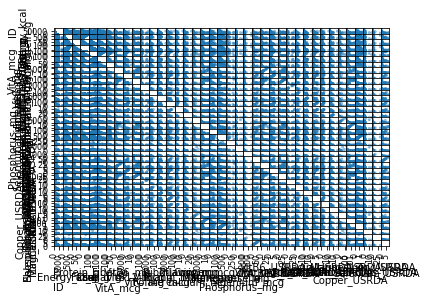

In [75]:
pd.plotting.scatter_matrix(dataex2)

จากกราฟจะเห็นได้ว่า ข้อมูลมีการทับซ้อนอยู่เป็นจำนวนมาก \
**แก้ปัญหา** 
หาคอลัมน์ที่ซ้ำกันอยู่แล้วให้ลบออก ให้เหลือแต่คอลัมน์ที่เป็นตัวเลข


In [78]:
new_dataex2 = dataex2.iloc[:,7:]
new_dataex2

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


ทดสอบ correlation

In [82]:
corr_2 = np.corrcoef(new_dataex2.to_numpy().T)  ## ดูค่า correlation

In [83]:
corr_2.shape  ## ขนาดของ correlation

(38, 38)

In [84]:
corr_2

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [86]:
for i in range(corr_2.shape[0]) :
        for j in range(corr_2.shape[1]) :
             if ( i !=j ) and (corr_2[i,j] ==1.) :
                 print(f'row = {i} column = {j} corrcoef = {corr_2[i,j]} ')

## คำสั่งวนลูปเพื่อแสดงว่ามีค่าที่ซ้ำกันหรือไม่

row = 10 column = 27 corrcoef = 1.0 
row = 12 column = 29 corrcoef = 1.0 
row = 13 column = 30 corrcoef = 1.0 
row = 14 column = 31 corrcoef = 1.0 
row = 18 column = 34 corrcoef = 1.0 
row = 20 column = 35 corrcoef = 1.0 
row = 22 column = 37 corrcoef = 1.0 
row = 27 column = 10 corrcoef = 1.0 
row = 29 column = 12 corrcoef = 1.0 
row = 30 column = 13 corrcoef = 1.0 
row = 31 column = 14 corrcoef = 1.0 
row = 34 column = 18 corrcoef = 1.0 
row = 35 column = 20 corrcoef = 1.0 
row = 37 column = 22 corrcoef = 1.0 


In [87]:
## เมื่อรันแล้วพบว่ามีค่าที่ซ้ำกัน

In [88]:
new_dataex2.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


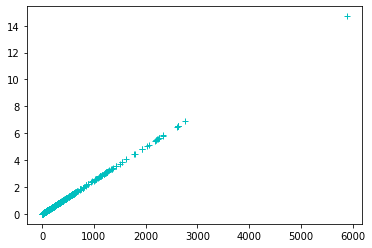

In [91]:
plt.plot(new_dataex2.iloc[:,11], new_dataex2.iloc[:,28], '+c')

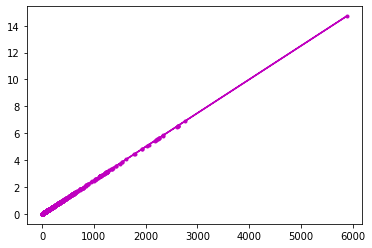

In [96]:
plt.plot(new_dataex2.iloc[:,11], new_dataex2.iloc[:,28], '.-m')

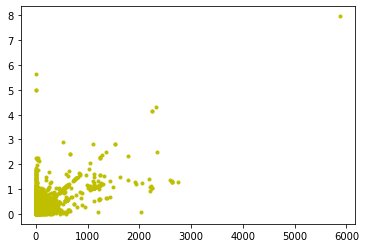

In [97]:
plt.plot(new_dataex2.iloc[:,11], new_dataex2.iloc[:,29], '.y')

In [99]:
new_dataex2.columns.str.contains('_USRDA')
 
 ## _USRDA คือ column ที่เป็นจริง TRUE

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [103]:
new_dataex2.columns[new_dataex2.columns.str.contains('_USRDA')].values

## เลือก column ที่เป็น TRUE

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [104]:
new_dataex2.drop(new_dataex2.columns[new_dataex2.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


ลบ columns ที่มีค่า corr เป็น 1 เมื่อเทียบกับ columns อื่นๆ

In [108]:
new_dataex2_drop = new_dataex2.drop(['VitE_mg' , 'Niacin_mg' , 'Riboflavin_mg', 'Thiamin_mg' , 'Magnesium_mg' , 'Phosphorus_mg' , 'Zinc_mg'] , axis=1)
new_dataex2_drop

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [115]:
new_dataex2_drop = dataex2.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
new_dataex2_drop

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


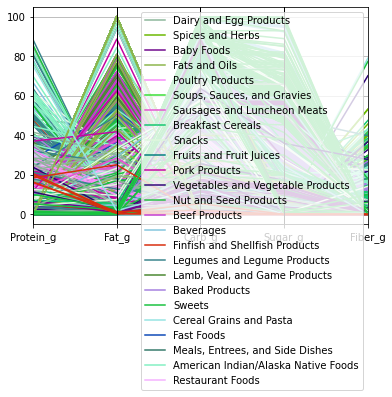

In [116]:
pd.plotting.parallel_coordinates(new_dataex2_drop, 'FoodGroup', cols=['Protein_g', 'Fat_g',	'Carb_g',	'Sugar_g',	'Fiber_g'])

# **PCA**

In [127]:
pca = PCA(n_components=2)

In [140]:
newpca = pca.fit_transform(new_dataex2.to_numpy())

In [141]:
newpca.shape

(8618, 2)

In [142]:
newpca

array([[ 588.69780673,  -44.53168866],
       [ 588.68143068,  -45.20426832],
       [ 744.99192442,  -42.01193043],
       ...,
       [ -98.22387404, -140.37618293],
       [ -64.41757591,   20.07306677],
       [ -65.03360105,    6.96656715]])

In [151]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

In [152]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [154]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [155]:
dataex2_dropped = new_dataex2_drop.replace(color_list2)

In [156]:
dataex2_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


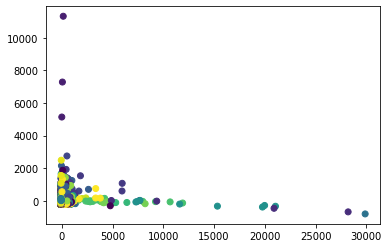

In [159]:
plt.scatter(newpca[:,0],newpca[:,1],c = dataex2_dropped['FoodGroup'])

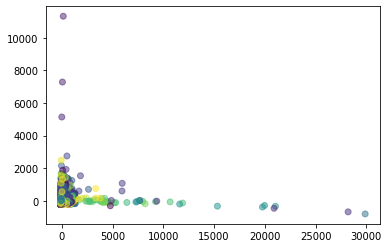

In [160]:
plt.scatter(newpca[:,0],newpca[:,1],c = dataex2_dropped['FoodGroup'], alpha=0.5)

In [161]:
bbf = dataex2_dropped[(dataex2_dropped['FoodGroup']==1) | (dataex2_dropped['FoodGroup']==22)]

In [162]:
bbf

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
231,22,263.0,6.09,8.69,72.12,0.00,21.6,27.0,0.21,0.0,39.2,36.0,661.0,0.553,7.06,2.943,2.7,0.030000,0.123529,0.0,0.435556,0.000000,0.0900,0.178750,0.048462,0.084167,0.550833,0.000614,0.321429,0.161429,0.049091,0.091818
232,22,337.0,17.60,15.90,50.02,0.00,14.6,16.0,0.65,0.0,21.0,10.0,646.0,0.910,36.96,2.300,5.0,0.017778,0.382353,0.0,0.233333,0.000000,0.0250,0.191250,0.223077,0.283333,0.538333,0.001011,0.404762,0.628571,0.090909,0.481818
233,22,233.0,22.98,4.07,47.75,1.71,37.7,37.0,1.34,0.0,0.8,310.0,2240.0,2.100,89.80,9.800,3.0,0.041111,0.788235,0.0,0.008889,0.713333,0.7750,0.306250,0.923077,0.066667,1.866667,0.002333,1.692857,0.391429,0.054545,0.645455
234,22,313.0,7.61,8.36,74.97,0.00,26.3,309.0,1.74,0.0,46.5,180.0,834.0,0.416,43.00,8.167,2.8,0.343333,1.023529,0.0,0.516667,0.000000,0.4500,0.125312,0.323846,0.007500,0.695000,0.000462,0.285714,0.161429,0.050909,0.336364
235,22,333.0,19.77,14.59,49.90,0.64,38.0,18.0,0.36,0.0,21.0,10.0,689.0,0.910,16.23,1.300,12.1,0.020000,0.211765,0.0,0.233333,0.166667,0.0250,0.225375,0.291538,0.319167,0.574167,0.001011,0.614286,0.811429,0.220000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,1,389.0,6.60,0.90,88.60,1.35,2.6,0.0,0.09,0.0,250.0,5.0,38.0,0.377,9.00,1.298,16.3,0.000000,0.052941,0.0,2.777778,0.008667,0.0125,1.577500,1.446154,1.333333,0.031667,0.000419,0.088095,0.361429,0.296364,0.300000
8589,1,91.0,1.00,0.20,21.34,11.36,1.6,0.0,0.26,0.0,21.9,17.0,4.0,0.040,0.30,0.000,1.1,0.000000,0.152941,0.0,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
8590,1,68.0,0.30,0.20,16.30,14.66,1.0,2.0,0.06,0.0,12.3,4.0,3.0,0.030,0.10,0.000,0.6,0.002222,0.035294,0.0,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
8594,1,73.0,0.50,0.20,17.18,14.87,2.0,3.0,0.07,0.0,12.7,6.0,6.0,0.035,0.17,0.000,0.4,0.003333,0.041176,0.0,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [163]:
pca = PCA(n_components=2)
newpca2 = pca.fit_transform(bbf.iloc[:,1:].to_numpy())

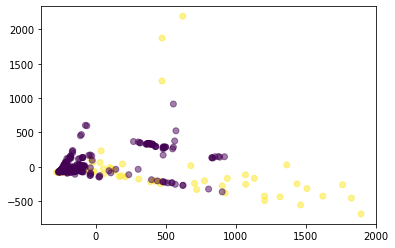

In [164]:
plt.scatter(newpca2[:,0],newpca2[:,1],c = bbf['FoodGroup'],alpha=0.5)

In [166]:
bab_pca = pca.transform(bbf[bbf['FoodGroup']==1].iloc[:,1:].to_numpy())
sph_pca = pca.transform(bbf[bbf['FoodGroup']==22].iloc[:,1:].to_numpy())

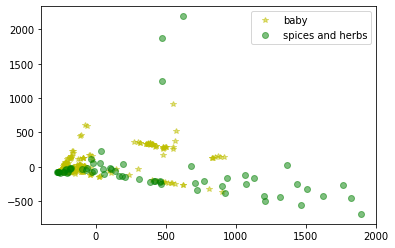

In [168]:
plt.plot(bab_pca[:,0],bab_pca[:,1], '*y' , alpha=0.5, label='baby')
plt.plot(sph_pca[:,0],sph_pca[:,1], 'og' , alpha=0.5, label='spices and herbs')
plt.legend()

In [169]:
pca.explained_variance_ratio_

array([0.69860777, 0.22364786])

# ใส่ชื่อกราฟและแกน

Text(0, 0.5, 'PCA2 (22.34%')

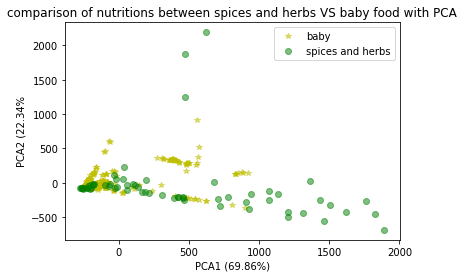

In [171]:
plt.plot(bab_pca[:,0],bab_pca[:,1], '*y' , alpha=0.5, label='baby')
plt.plot(sph_pca[:,0],sph_pca[:,1], 'og' , alpha=0.5, label='spices and herbs')
plt.legend()
plt.title('comparison of nutritions between spices and herbs VS baby food with PCA')
plt.xlabel('PCA1 (69.86%)')
plt.ylabel('PCA2 (22.34%')

ดังนั้น component ที่เหมาะสมที่สุดถึกเลือกใช้ตะครอบคลุม 80-90% เปรียบเทียบแล้วสารอาหารระหว่าง spices and herbs VS baby food แล้ว PCA1 + PCA2 = 69.86% + 22.34% เท่ากับ 92.22% อธิบายครอบคลุม